In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load data and check
product = pd.read_csv('product.csv')
print(product.describe(include='all'))
print(product.info())
product.head()

        Unnamed: 0   brand    flavour  volume_per_joghurt_g   packsize  \
count    27.000000      27         27             27.000000  27.000000   
unique         NaN       9          5                   NaN        NaN   
top            NaN  Danone  blueberry                   NaN        NaN   
freq           NaN       5          7                   NaN        NaN   
mean     13.000000     NaN        NaN            625.925926   4.703704   
std       7.937254     NaN        NaN            342.886607   2.232880   
min       0.000000     NaN        NaN            150.000000   1.000000   
25%       6.500000     NaN        NaN            500.000000   3.500000   
50%      13.000000     NaN        NaN            500.000000   6.000000   
75%      19.500000     NaN        NaN           1000.000000   6.000000   
max      26.000000     NaN        NaN           1000.000000   6.000000   

        product_id  
count    27.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean  

,Unnamed: 0,brand,flavour,volume_per_joghurt_g,packsize,product_id
0,0,Mueller,blueberry,150,6,0
1,1,Oikos,chocolate,1000,1,1
2,2,Alnatura,strawberry,1000,1,2
3,3,Mueller,straciatella,500,6,3
4,4,Danone,straciatella,150,6,4


In [4]:
sales = pd.read_csv('sales.csv')
print(sales.info())
print(sales.describe(include='all'))
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  260 non-null    int64  
 1   date        260 non-null    object 
 2   product_id  260 non-null    int64  
 3   price       260 non-null    float64
 4   units       260 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 10.3+ KB
None
        Unnamed: 0        date  product_id       price        units
count   260.000000         260  260.000000  260.000000   260.000000
unique         NaN          10         NaN         NaN          NaN
top            NaN  2020-01-01         NaN         NaN          NaN
freq           NaN          27         NaN         NaN          NaN
mean    133.611538         NaN   12.911538    5.288538  1177.496154
std      78.528842         NaN    7.846738    1.881547   401.771103
min       0.000000         NaN    0.000000    1.460000    16.0000

,Unnamed: 0,date,product_id,price,units
0,0,2020-01-01,0,4.65,1126.0
1,1,2020-01-02,0,4.76,1205.0
2,2,2020-01-03,0,5.22,1007.0
3,3,2020-01-04,0,5.45,1282.0
4,4,2020-01-05,0,3.33,1037.0


In [5]:
#prepare data for combination
product = product.drop(['Unnamed: 0'], axis=1)


In [6]:
#checking out date data
print(sales['date'].max(), sales['date'].min())
sales['date'] = pd.to_datetime(sales['date'], format='%Y-%m-%d')
sales['weekday'] = sales['date'].dt.day_name()

2020-01-10 2020-01-01


In [7]:
#combine and check for missing values                        
df = pd.merge(product, sales, how='right', on='product_id')
print(df.brand.isna().sum())
df.head()

0


,brand,flavour,volume_per_joghurt_g,packsize,product_id,Unnamed: 0,date,price,units,weekday
0,Mueller,blueberry,150,6,0,0,2020-01-01,4.65,1126.0,Wednesday
1,Mueller,blueberry,150,6,0,1,2020-01-02,4.76,1205.0,Thursday
2,Mueller,blueberry,150,6,0,2,2020-01-03,5.22,1007.0,Friday
3,Mueller,blueberry,150,6,0,3,2020-01-04,5.45,1282.0,Saturday
4,Mueller,blueberry,150,6,0,4,2020-01-05,3.33,1037.0,Sunday


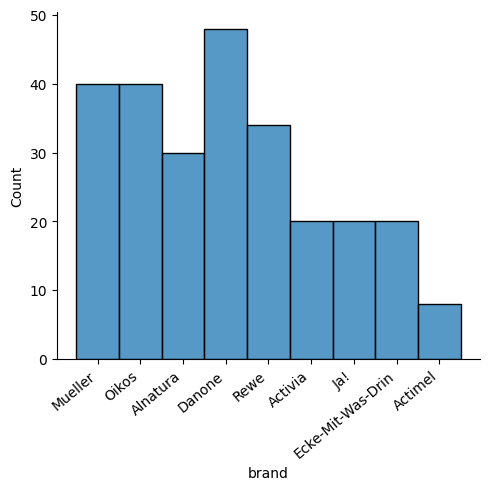

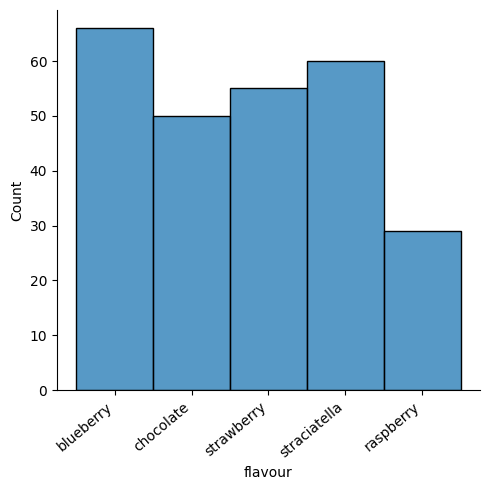

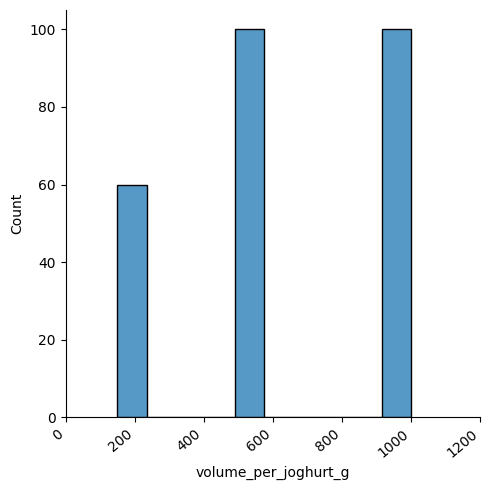

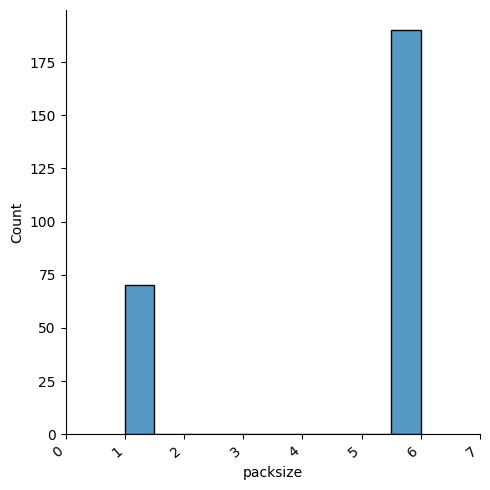

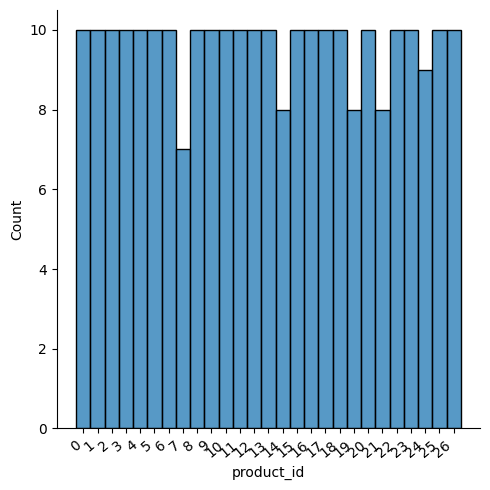

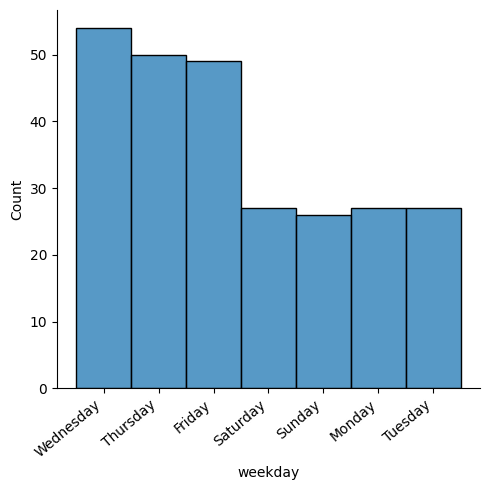

In [8]:
#how product characteristics drive sales & how sales distribute over weekdays
df['product_id'] = df['product_id'].astype(str)
product_feature = product.columns.to_list() + ['weekday']
for i in product_feature :
    ax = sns.displot(df, x=i)
    ax.set_xticklabels( rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

thought: probably a preselected/toy dataset bcs the quantity per id capped at 10 and the sales to weekday relationship deviate from normal retail behavior, maybe this is wholesale/toy data.

next assuming price means unit price, checking if unit price is fixed or varied.

In [19]:
#is the product price stable
df.groupby(['product_id'
            ]).agg({'price': ['mean', 'std', 'min', 'max']}).head()

price                      
             mean       std   min   max
product_id                             
0           4.602  0.821743  3.33  6.11
1           3.917  1.602082  1.65  6.86
10          7.107  1.833546  3.34  9.42
11          6.221  0.829718  4.93  7.77
12          5.570  1.704888  2.90  8.28

<AxesSubplot:xlabel='product_id', ylabel='price'>

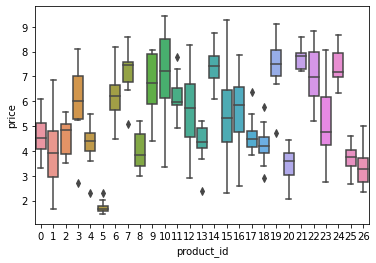

In [86]:
sns.boxplot(x='product_id', y='price', data=df)

price has a wide range variation across product

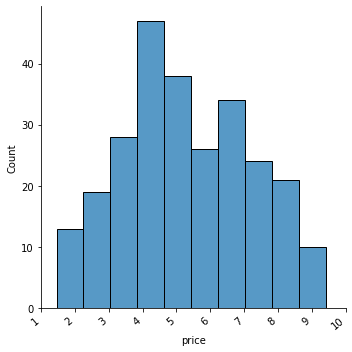

In [65]:
#relationship between price and sales
ax = sns.displot(df, x='price')
ax.set_xticklabels( rotation=40, ha="right")
plt.tight_layout()
plt.show()

positive skewed

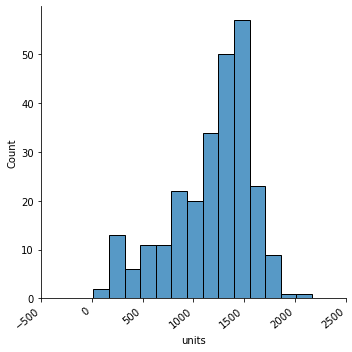

In [90]:
#relationship between price and sales
ax = sns.displot(df, x='units')
ax.set_xticklabels( rotation=40, ha="right")
plt.tight_layout()
plt.show()

negative skewed

<AxesSubplot:xlabel='price', ylabel='units'>

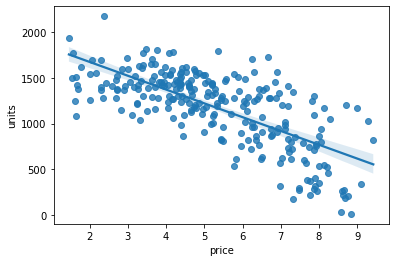

In [67]:
#relationship between price and sales
sns.regplot(x='price', y='units', data=df)

strong negative correlation between price and unit sales, this means either customer tends to buy more units if the prices are lower or they obtain a higher discount when they order higher quantity 

<AxesSubplot:xlabel='price', ylabel='weight'>

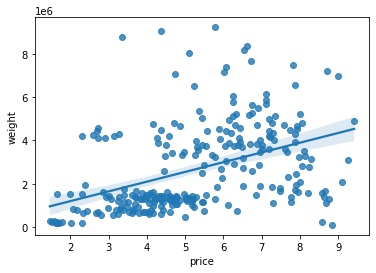

In [71]:
#does it remain the same if we check for the weight instead of the unit
df['weight'] = df["volume_per_joghurt_g"] * df['packsize'] * df['units']
sns.regplot(x='price', y='weight', data=df)

interesting to see the negative correlation only exist between unit sales and unit price but not total weight purchased. 

<AxesSubplot:xlabel='price', ylabel='weight'>

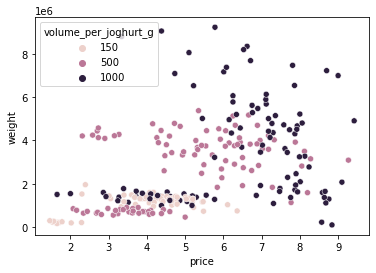

In [80]:
sns.scatterplot(x='price', y='weight', hue="volume_per_joghurt_g", data=df)

<AxesSubplot:xlabel='price', ylabel='weight'>

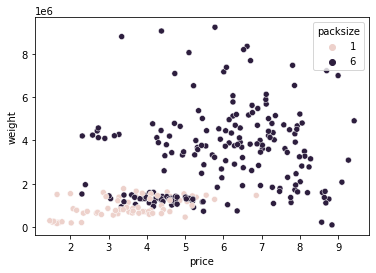

In [81]:
sns.scatterplot(x='price', y='weight', hue="packsize", data=df)

<AxesSubplot:xlabel='packsize', ylabel='units'>

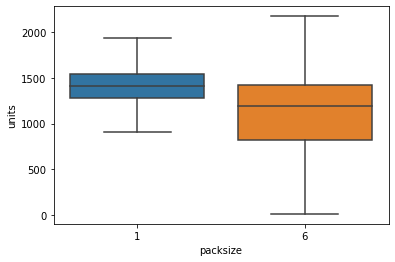

In [83]:
sns.boxplot(x='packsize', y='units', data=df)

<AxesSubplot:xlabel='volume_per_joghurt_g', ylabel='units'>

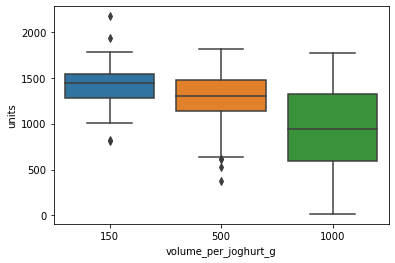

In [85]:
sns.boxplot(x='volume_per_joghurt_g', y='units', data=df)

look like single pack/ small portion jogurt tends to have lower unit price, and the order/bought unit doesn't present a siginificant difference between packging, which leads to biger pack/ biger portion weighted way more in total weight purchase and leads to a positive correlation between price and total weight

In [89]:
df.to_csv( 'df.csv', index=False)